<div class="alert alert-block alert-info">
<b>Банки — Анализ оттока клиентов</b> 
    

<div class="alert alert-block alert-info">
<b>Декомпозиция</b> 

0.	Введение
- Цель проекта
- Описание данных
1. Загрузка данных и обзор датафрейма
- Подключение библиотек
- Чтение файла
- Вывод 5 слуйчайных строк, инф. о типах данных, размер датасета, кол-во пропусков в столбцах, кол-ов дубликатов, проверка о состоянии данных
2. Предобработка данных
- Если есть пропуски, дубликаты, то необходимо оценить и принять решение о их дальнешейм преобразовании
- Преобразование названий и типов данных столбцов
- Создание дополнительных столбцов с объединяющими признаками
3. Исследовательский анализ данных
- Создание гистограмм по численным значениям
- Создание столбчатых диаграм плотности для булевых значений
- Матрица корреляции
4. Сегментация пользователей и проверка гипотез
- Сегментация по признаку estimated_values, Balance, Products
- Проверка статистических гипотез
- Если будут заметны другие признаки для сегментации, то необходимо расширить анализ
5. Выводы и Рекомендации
- Выявить основные признаки, которые влияют на отток. 
- Сделать рекомендации, на что стоит обратить внимание сотрудникам банка 
6. Дашборд
7. Презентация


<div class="alert alert-block alert-info">
<b>0. Введение</b> 
    
В данном проекте будут проанализированы клиенты регионального банка «Метанпромбанк» и составлен портрет клиентов, которые склонны уходить из банка.
    
    
Описание данных:
Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.  
    
    
Колонки:  
    
•	userid — идентификатор пользователя,  
    
•	score — баллы кредитного скоринга,  
    
•	City — город,  
    
•	Gender — пол,  
    
•	Age — возраст,  
    
•	Objects — количество объектов в собственности,  
    
•	Balance — баланс на счёте,  
    
•	Products — количество продуктов, которыми пользуется клиент,  
    
•	CreditCard — есть ли кредитная карта,  
    
•	Loyalty — активный клиент,  
    
•	estimated_salary — заработная плата клиента,  
    
•	Churn — ушёл или нет.  
    
</div>

<div class="alert alert-block alert-info">
<b>1. Загрузка данных и обзор датафрейма</b> 

In [1]:
#добавление библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from matplotlib import pyplot as plt
import scipy.stats as st
import warnings 
warnings.filterwarnings('ignore')
import math as mth
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
#чтение датафрейма
data = pd.read_csv('bank_dataset.csv')

In [3]:
def check_dataset(dataset):
    try:
            print('\033[1m','Случайные 5 строк таблицы:','\033[0m')
            display(dataset.sample(5))
            print('\033[1m','Информация о типах данных:\n', '\033[0m')
            dataset.info()
            print('\033[1m','\nРазмер датасета:\n', '\033[0m')
            display(dataset.shape)
            print('\033[1m', 'Количество пропусков в столбцах:\n', '\033[0m')
            display(dataset.isna().sum())
            print('\033[1m', '\nКоличество дубликатов:', '\033[0m'), 
            display(dataset.duplicated().sum()) 
            print('\033[1m', '\nПроверка о состоянии данных. Метод describe():', '\033[0m'), 
            display(dataset.describe())
    except:
            print('Ошибка')

check_dataset(data)

 Случайные 5 строк таблицы: 


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
3693,15764982,742,Ярославль,Ж,60,4,NaN,1,1,1,13161.66,1
8166,15812519,542,Рыбинск,М,37,8,NaN,1,1,1,807.06,0
9509,15652540,688,Ярославль,М,29,1,NaN,2,1,0,154695.57,0
2693,15670433,662,Ярославль,М,34,2,NaN,2,0,1,21497.27,0
4095,15659665,730,Рыбинск,М,62,5,112181.08,1,0,1,61513.87,0


 Информация о типах данных:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
 
Размер датасета:
 


(10000, 12)

 Количество пропусков в столбцах:
 


userid              0   
score               0   
City                0   
Gender              0   
Age                 0   
Objects             0   
Balance             3617
Products            0   
CreditCard          0   
Loyalty             0   
estimated_salary    0   
Churn               0   
dtype: int64

 
Количество дубликатов: 


0

 
Проверка о состоянии данных. Метод describe(): 


,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
display(data[data.isna().any(axis=1)].head(10))

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
13,15734219,549,Ярославль,Ж,25,5,NaN,2,0,0,190857.79,0
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951.65,0
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406.41,0
18,15704243,587,Рыбинск,М,45,6,NaN,1,0,0,158684.81,0
19,15611718,726,Ярославль,Ж,24,6,NaN,2,1,1,54724.03,0


In [5]:
display(data.sort_values(by = 'estimated_salary', ascending = True).head(10))

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
2362,15833789,709,Ростов Великий,М,45,4,122917.71,1,1,1,11.58,1
9647,15722429,625,Ярославль,М,31,5,NaN,2,0,1,90.07,0
9010,15829199,645,Ростов Великий,Ж,59,8,121669.93,2,0,0,91.75,1
5548,15682398,710,Ярославль,М,38,2,NaN,2,1,0,96.27,0
4989,15645587,629,Ярославль,М,40,9,NaN,1,1,0,106.67,0
7565,15666105,708,Ярославль,М,52,10,105355.81,1,1,0,123.07,1
2498,15691471,718,Ярославль,М,37,8,NaN,2,1,1,142.81,0
8722,15761403,621,Ярославль,М,35,7,87619.29,1,1,0,143.34,0
4774,15683157,811,Ярославль,Ж,35,7,NaN,1,1,1,178.19,0
1451,15726934,551,Ярославль,Ж,38,10,NaN,2,1,1,216.27,0


<div class="alert alert-block alert-info">
Исходные данные в порядке их можно брать в работу, предварительно сделав предобработку данных.
Дополнительно изучим признаки City, Genger, Products.
    
Есть пропуски в Balance. Это могут быть нулевые значения или ошибки данных.   
    
В estimated_salary есть клиенты у которых доход, аномально низкий, но есть непропорционально большие средства на балансе.  
Одно из предлположений, что estimated_salary это средний годовой показатель и на дистанции год, он получается низким из-за следующих причин: 
Клиент мог остаться без дохода или не получает ЗП на счет банка.
    
</div>

<div class="alert alert-block alert-info">
<b>2. Предобработка данных</b> 
    

In [6]:
#Сделаем замену в Gender М - 1, Ж - 0

data['Gender'] = data['Gender'].replace('М',1)
data['Gender'] = data['Gender'].replace('Ж',0)

In [7]:
#Посмотрим на доли по продуктам
display(data.pivot_table(index='Products', values='userid', columns = 'Churn', aggfunc='count'))

Churn,0,1
Products,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,NaN,60.0


<div class="alert alert-block alert-info">
<b>3. Исследовательский анализ данных</b> 
    

In [8]:
print('Доля пользователей, которые ушли в отток {:.2%}'.format(data.query('Churn == 1')['Churn'].count()/data['Churn'].count()))

Доля пользователей, которые ушли в отток 20.37%


<div class="alert alert-block alert-info">
Итого мы имеем большинство пользователей, которые продолжают пользователься банком. Это почти 80%.
</div>

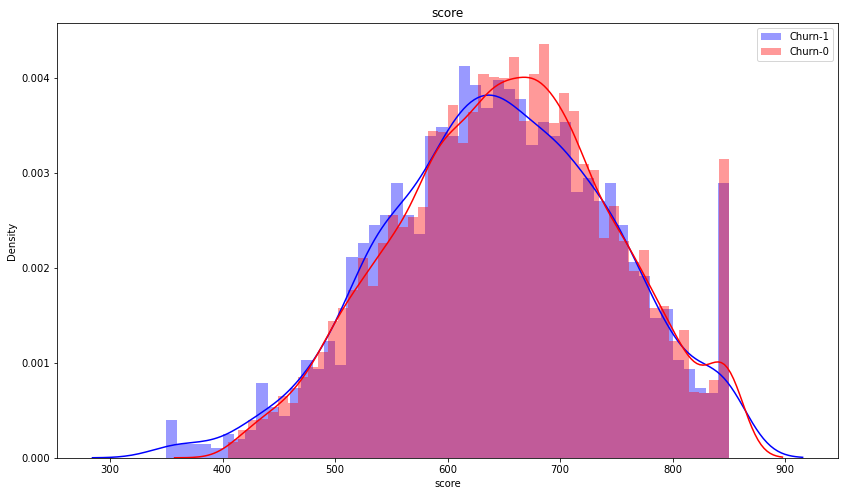

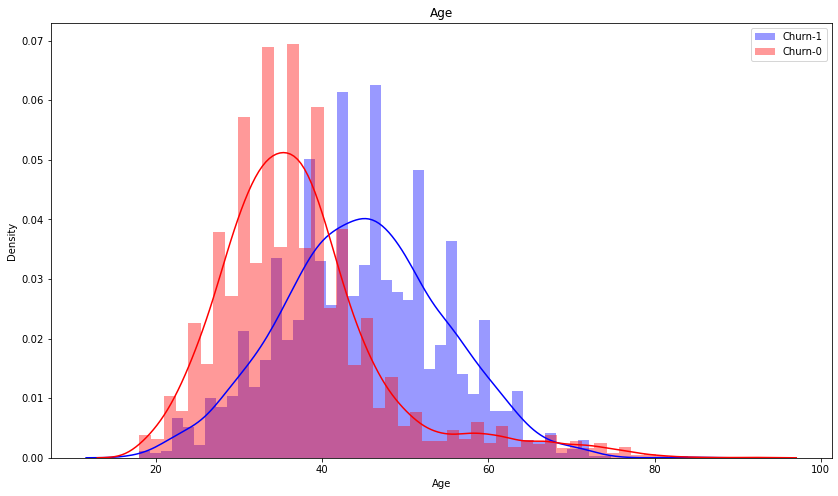

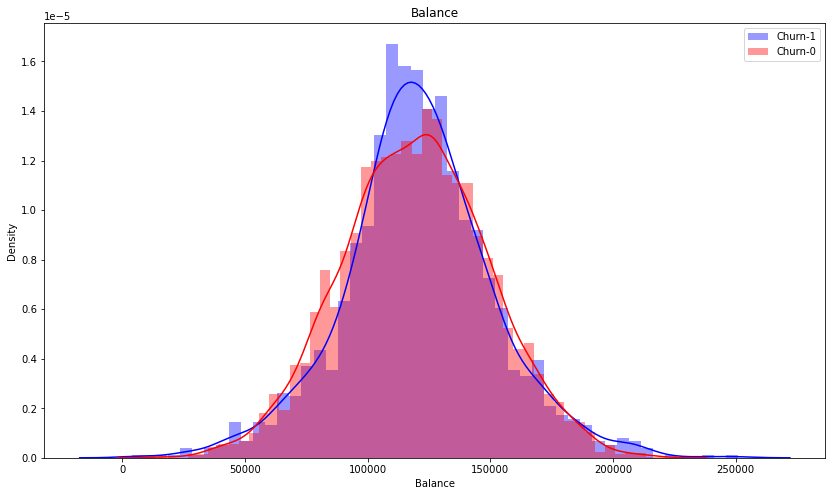

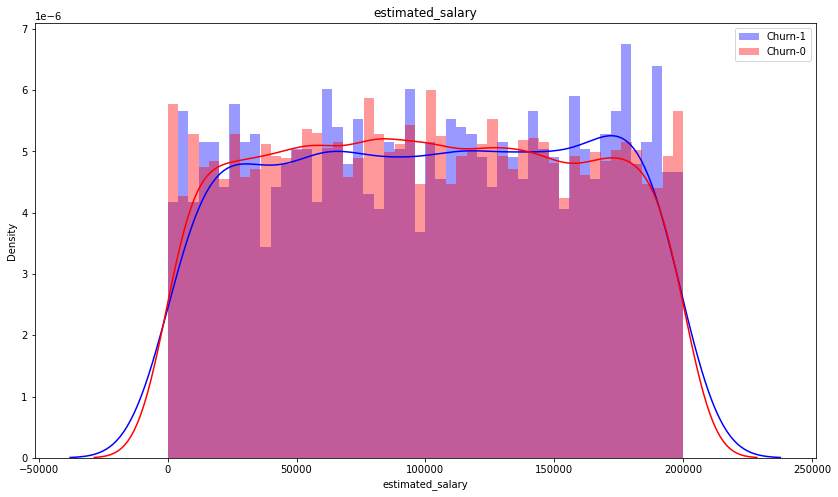

In [9]:
list_features_num = np.array(['score', 'Age', 'Balance', 'estimated_salary'])

for col in list_features_num:
    plt.figure(figsize=(14,8))
    sns.distplot(data.query('Churn == 1')[col], bins=50, color='blue', label = 'Churn-1') 
    sns.distplot(data.query('Churn == 0')[col], bins=50, color='red', label = 'Churn-0') 
    plt.xlabel(col)
    plt.legend()
    plt.ylabel("Density")  
    plt.title(col)
    plt.show()

<div class="alert alert-block alert-info">
    
- Баллы кредитного скоринга(score) не вляют на отток  
    
- Клиенты в возрасте 30-40 менее склоны к оттоку, а клиенты 40-50 чаще отказываются от услуг 

- Предварительно можно сказать, что баланс на счете и оценочная ЗП клиента не влияют на отток. Нужны дополнительные исследования
    

    
    
</div>

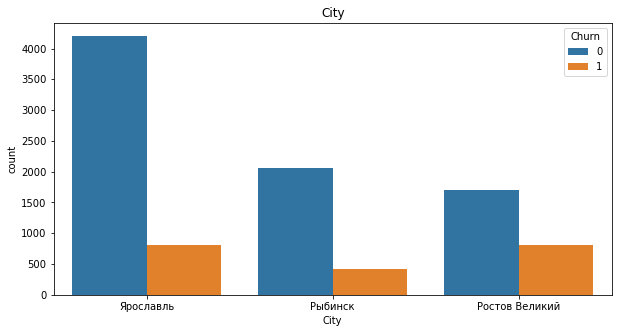

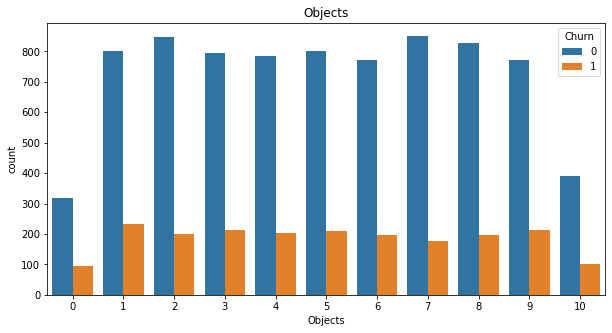

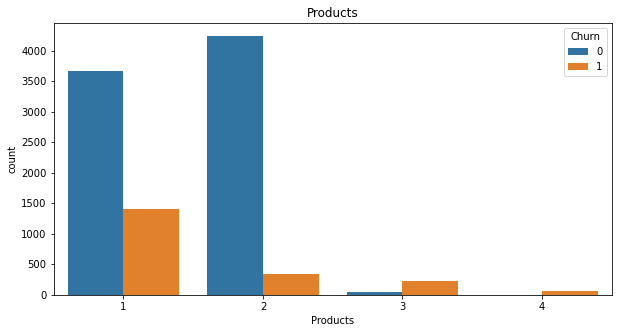

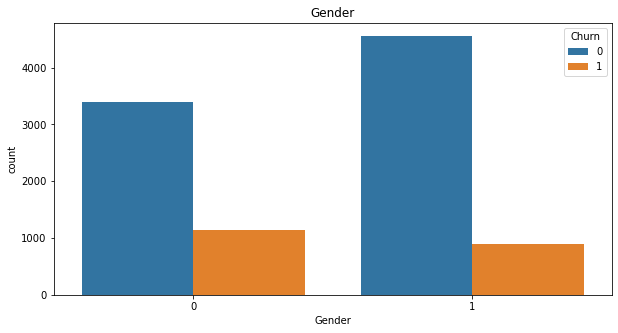

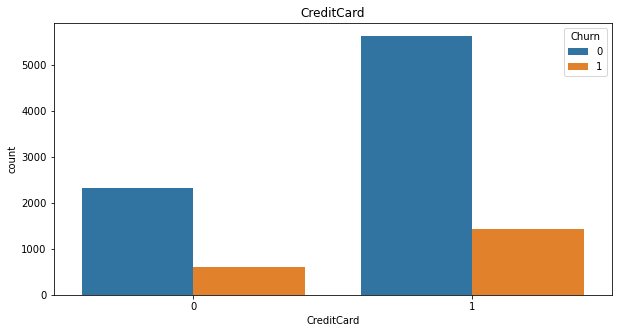

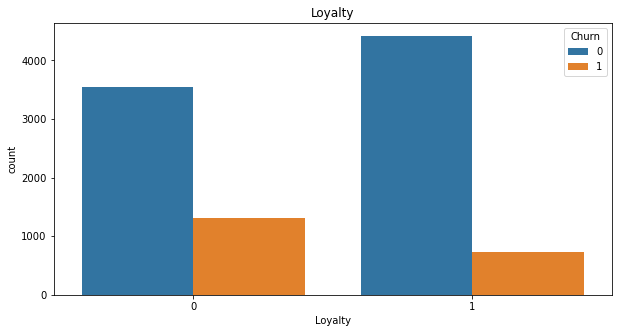

In [10]:
list_feature_bool = np.array(['City', 'Objects','Products', 'Gender', 'CreditCard', 'Loyalty'])

for col in list_feature_bool:
    plt.figure(figsize=(10,5))
    sns.countplot(data[col], hue=data['Churn']) 
    plt.xlabel(col)
    plt.ylabel("count")  
    plt.title(col)
    plt.show()

In [11]:
list_feature_bool = np.array(['City', 'Objects', 'Gender', 'Products', 'CreditCard', 'Loyalty'])
for col in list_feature_bool:
    tables = data.pivot_table(index=col, columns=data['Churn'], values='userid', aggfunc='count').reset_index()
    tables.columns = [col, '0','1']
    tables['rate_churn'] = (tables['1']/(tables['0'] + tables['1'])).round(2)
    display(tables)

,City,0,1,rate_churn
0,Ростов Великий,1695,814,0.32
1,Рыбинск,2064,413,0.17
2,Ярославль,4204,810,0.16


,Objects,0,1,rate_churn
0,0,318,95,0.23
1,1,803,232,0.22
2,2,847,201,0.19
3,3,796,213,0.21
4,4,786,203,0.21
5,5,803,209,0.21
6,6,771,196,0.20
7,7,851,177,0.17
8,8,828,197,0.19
9,9,771,213,0.22


,Gender,0,1,rate_churn
0,0,3404,1139,0.25
1,1,4559,898,0.16


,Products,0,1,rate_churn
0,1,3675.0,1409.0,0.28
1,2,4242.0,348.0,0.08
2,3,46.0,220.0,0.83
3,4,NaN,60.0,NaN


,CreditCard,0,1,rate_churn
0,0,2332,613,0.21
1,1,5631,1424,0.20


,Loyalty,0,1,rate_churn
0,0,3547,1302,0.27
1,1,4416,735,0.14


<div class="alert alert-block alert-info">
    
- Наиболее устойчив к оттоку Ярославль(16%) и Рыбинск(17%). В Ростове Великом соотношение ушедших пользователей составляет 1/3 от всей выборки.
- В выборке мало пользователей, у которых нет объектов недвижимости. Можно сказать, что кол-во объектов недвижимости не влияет на отток.  
- Пользователей мужчин больше, чем женщин. Мужчин(16%) чаще остаются клиентами банка, чем женщины(25%)  
- Наличие 2ух продутов положительно сказывается на удержании клиентов. Для оценки наличия 3 и 4 продуктов необходимо больше данных.
- Сложно сказать влияет ли наличие кредитной карты на отток. Так как мало пользователей у которых нет кредитной карты. Соотношение примерно одинаково 20-21% 
- А вот активность положительно сказывается на желание клиента быть с банком 14% против 27% (пассивность)
</div>

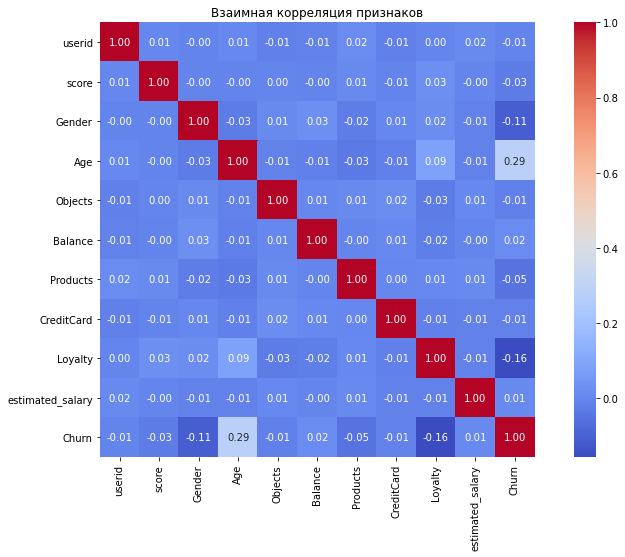

In [12]:
#Построим матрицу корреляций и отобразите её

cm = data.corr()   
plt.figure(figsize=(14,8))
plt.title('Взаимная корреляция признаков')
sns.heatmap(cm, annot = True, square=True, fmt='.2f', cmap ='coolwarm')
plt.show()

<div class="alert alert-block alert-info">
    
- Не выявленно ниодной корреляции между признаками

</div>

<div class="alert alert-block alert-info">
<b>4. Сегментация пользователей и проверка гипотез </b>
</div>

In [13]:
#Проверим гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.
#Нулевая гипотеза - нет статистически значимых различий в доходах между группами
#Альтернативная гипотеза - есть статистически значимые различия в доходах между группами


salary_churn1 = data.query('Churn == 1')['estimated_salary']
salary_churn0 = data.query('Churn == 0')['estimated_salary']


alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.mannwhitneyu(salary_churn1, salary_churn0)


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Доходы в обоих группах имеют стат. различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Доходы в обоих группах не имеют стат. различий') 
    
    

p-значение: 0.11352575465076892
Не получилось отвергнуть нулевую гипотезу. Доходы в обоих группах не имеют стат. различий


In [14]:
#Проверим гипотезу различия баланса между теми клиентами, которые ушли и теми, которые остались.
#Нулевая гипотеза - нет статистически значимых различий в балансах между группами
#Альтернативная гипотеза - есть статистически значимые различия в балансах между группами

balance = data.dropna()

balance_churn1 = balance.query('Churn == 1')['Balance']
balance_churn0 = balance.query('Churn == 0')['Balance']


alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.mannwhitneyu(balance_churn1, balance_churn0)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу. Балансы в группах имеет стат. различия')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Балансы в обоих группах не имеют стат. различий') 
    
    

p-значение: 0.11075442777959688
Не получилось отвергнуть нулевую гипотезу. Балансы в обоих группах не имеют стат. различий


In [15]:
display(balance_churn1.head())
display(balance_churn0.head())

2     159660.80
5     113755.78
7     115046.74
16    132602.88
35    134264.04
Name: Balance, dtype: float64

1     83807.86 
4     125510.82
8     142051.07
9     134603.88
10    102016.72
Name: Balance, dtype: float64

<div class="alert alert-block alert-info">
Баланс и доходы не влияют на отток. Статистически значимого различия нет.

</div>

In [16]:
#Посмотрим на состав продуктов

prod_pivot = data.pivot_table(index='Products', values='userid', columns = 'Churn', aggfunc='count').reset_index()
prod_pivot.columns = ['products', '0', '1']

display(prod_pivot)


,products,0,1
0,1,3675.0,1409.0
1,2,4242.0,348.0
2,3,46.0,220.0
3,4,NaN,60.0


<div class="alert alert-block alert-info">
Сводная таблица показала, что клиенты с продуктами 3 и 4 не имеют многочисленное кол-во данных.  
    
Проверка гипотез для клиентов 3, 4 совместно с клиентами 1, 2 не даст реальных показателей.  
    
Поэтому в дальнейшем будем проводить проверку гипотез только для продуктов 1, 2.  
    
</div>

In [17]:
#Нулевая гипотеза - Доли оттока между группами 1 (1 продукт) и 2 (2 продукта) не различаются
#Альтернативная гипотеза - Доли оттока между группами 1 (1 продукт) и 2 (2 продукта) имеют статистические различия

trials = np.array([prod_pivot['0'].values[0], prod_pivot['0'].values[1]])
successes = np.array([prod_pivot['1'].values[0], prod_pivot['1'].values[1]])


print('successes',successes)
print('trials',trials)

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2 

# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)  

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

successes [1409.  348.]
trials [3675. 4242.]
p-значение:  0.0
Отвергаем нулевую гипотезу: между долями есть значимая разница


<div class="alert alert-block alert-info">
Доли между продуктами имеют стат. значимые различия.
Можно сказать, что наличие 2 продуктов позволяет удерживать клиента
</div>

<div class="alert alert-block alert-info">
<b>5. Выводы и Рекомендации</b> 
    

<div class="alert alert-block alert-info">
В ходе анализа были выявлены признаки, которые влияют на отток/удержание клиентов.  
    
- Проживание влияет на отток. Клиенты из Ярославля более устойчивы к оттоку 16% от выборки города.  
    
- Мужчины(16%) чаще остаются клиентами банка, чем женщины(25%)  
    
- Клиенты в возрасте 30-40 менее склоны к оттоку, а клиенты 40-50 чаще отказываются от услуг  

- Активность положительно сказывается на желание клиента быть с банком 14% против 27% (пассивность)
    
- Наличие 2 продуктов положительно влияет на удержание клиента
    
    
Оценка скоринга (score), Баланс, Доходы, Наличие кредитной карты, не влияет на отток  
    
Рекомендации: 
- стоит бороться за привлечение клиентов в крупных городах (Ярославль), и следует предлагать доп продукты, проводить промо с клиентами из мелких городов (Ростов Великий).  
    
- Удерживать мужчин как клиентов банка проще. Женщины более слклоны покидать данный банк и для них необходимы дополнительные вложения. Для удержания женщин можно разработать карты с интересным дизайном или сделать коллоборация с другими услугами, семейный аккаунты(мужчина и женщина)

- Необходимо проводить дополнительные промо и коллоборации для лиц в возрасте 40-50. К примеру Пенсионная программа. На рынке банковских услуг стоит бороться за клиентов моложе 40 лет 
    
- Необходимо повышать активность клиентов различными розыгрышами, промо и т.д.  

- Подключение второго продукта залог удержания клиентов
    
Представленная выборка не дает полной картины об оттоке, так как мы работали только с положительной ее частью 80% клиентов прололжают работу с банком. В выборке не было временных рамок, мы не знаем за какой период был отток клиентов. Есть пропущенные данные в поле Balance. 
    
</div>

 
<link title="Презентация" href="https://disk.yandex.by/i/mo8vQCuuhoXp3w"> 

<a href="https://disk.yandex.by/i/UYrNPZUb5aB1Rg">Презентация</a>